# Homework 7: Classification

## The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

This homework assignment is very similar to the in-class lab exercise that you completed this week.


The dataset is from the "Malicious and Benign Websites" Kaggle project at https://www.kaggle.com/xwolf12/malicious-and-benign-websites/home (you'll need to go to that URL to get a full description of the data).

From the overview:

> The project consisted to evaluate different classification models to predict malicious and benign websites, based on application layer and network characteristics. The data were obtained by using different verified sources of benign and malicious URL's, in a low interactive client honeypot to isolate network traffic. We used additional tools to get other information, such as, server country with Whois.


In [262]:
MY_UNIQNAME = 'tabbie'

Your task is to build the best classifier you can, choosing from either Random Forests or Naive Bayes classifiers (i.e. no XGBoost, SVM, Logistic Regression, etc.).

You will need to split the complete dataset into training and testing datasets.  We recommend a 70%-30% split.

1. Build both Random Forest (10 points) and Naive Bayes (10 points) classifiers to predict the TYPE variable.  Be sure to provide interpretations of your results.

2. Experiment with changing the number of "folds" in your cross-validator for your Random Forest classifiers (10 points). Be sure to provide interpretations of your results.

3. Tune your Random Forest model by varying hyperparamters (15 points). Be sure to provide interpretations of your results.

3. Experiment with setting the appropriate values for *priors* in the Naive Bayes model (the priors should correspond to the proportions of the TYPE values) (10 points). Be sure to provide interpretations of your results.

4. Report the most important feature(s) based on your Random Forest classifier (10 points). Are you surprised by the results?  Explain why.

5. Summarize your findings, including which classifier and paramters gave you the best results and include an in-depth explanation of how you might improve your results.  You should also investigate what the different fields mean, so you'll need to do some research about websites and internet protocols! (15 points)


In [1]:
#Imports
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as skens
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as skmetric
from sklearn.metrics import accuracy_score, classification_report
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)
import sklearn.externals.six as sksix
import IPython.display as ipd
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import os
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
warnings.filterwarnings('ignore')
os.environ["PATH"] += os.pathsep + r'C:\Users\tabas\Anaconda3\pkgs\graphviz-2.38-hfd603c8_2\Library\bin\graphviz'

C:\Users\tabas\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
df_web = pd.read_csv('maliciousandbenign.csv')
df_web.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [5]:
df_web.dropna()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,B0_62,160,29,UTF-8,None,36829.0,US,CA,14/08/1997 0:00,14/06/2016 0:00,...,3,7,2402,25,22,4491,2900,25,6.0,0
1769,B0_2237,161,23,iso-8859-1,Apache/2.4.18 (Ubuntu),417.0,None,None,23/11/2010 0:00,20/11/2015 0:00,...,7,2,582,7,11,752,582,7,0.0,0
1774,B0_156,183,29,ISO-8859-1,Microsoft-IIS/7.5; litigation_essentials.lexis...,4890.0,US,NY,26/06/1997 0:00,18/11/2014 0:00,...,2,7,2062,30,26,8161,2742,30,8.0,0
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0


In [6]:
df_web.describe(include='all')

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781,1781.000000,1781.000000,1781,1780,969.000000,1781,1781,1781,1781,...,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
unique,1781,NaN,NaN,9,239,NaN,49,182,891,594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B0_2308,NaN,NaN,UTF-8,Apache,NaN,US,CA,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,676,386,NaN,1103,372,127,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,56.961258,11.111735,NaN,NaN,11726.927761,NaN,NaN,NaN,NaN,...,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,NaN,27.555586,4.549896,NaN,NaN,36391.809051,NaN,NaN,NaN,NaN,...,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,NaN,16.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,39.000000,8.000000,NaN,NaN,324.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,49.000000,10.000000,NaN,NaN,1853.000000,NaN,NaN,NaN,NaN,...,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,NaN,68.000000,13.000000,NaN,NaN,11323.000000,NaN,NaN,NaN,NaN,...,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000


In [7]:
# Dropping columns with unique variables
df_web = df_web.drop(labels=['URL','WHOIS_REGDATE','WHOIS_UPDATED_DATE'], axis='columns')
df_web.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,263.0,None,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,ISO-8859-1,nginx,162.0,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,UTF-8,None,124140.0,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [8]:
# Filling in the missing values
df_web_clean =  df_web.interpolate()
max_server_value = df_web_clean['SERVER'].value_counts().idxmax()
df_web_clean['SERVER'].fillna(max_server_value, inplace=True)
df_web_clean.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,263.0,None,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,ISO-8859-1,nginx,162.0,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,UTF-8,None,124140.0,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [9]:
print(len(df_web_clean))  #counting the number of rows
print(df_web_clean.Type.value_counts())  #counting the number of labels

1781
0    1565
1     216
Name: Type, dtype: int64


In [21]:
# Random Forest
rf_web = pd.get_dummies(df_web_clean, prefix_sep="_")

# Seperating the label from the data
content = rf_web.drop(labels='Type', axis='columns')
labels = rf_web['Type']

In [22]:
# the shape of the data
rf_web.shape

(1781, 493)

In [23]:
# splitting the content and labels into training and test data in the ratio of 70-30
content_train, content_test, labels_train, labels_test = train_test_split(content,labels,test_size=0.3, random_state=0)
columns = content_train.columns

In [24]:
# Goal is to predict the data through the Type variable as the label as to which type it belongs to. The predicted classes for type variable are will be "1" and "0". Featurization done.
# Building the model, choosing the classifier and training the model with training data.
rf_web_model = skens.RandomForestClassifier(n_estimators=10,oob_score=True,criterion='entropy')
rf_web_model.fit(content_train,labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
# Testing the model with the test data
predicted_labels = rf_web_model.predict(content_test)
content_test['predicted_rf_type']=predicted_labels

In [26]:
#Checking the model accuracy
rf_model_accuracy = accuracy_score(labels_test,predicted_labels)
print("Accuracy: {0:.2%})".format(rf_model_accuracy))

Accuracy: 97.76%)


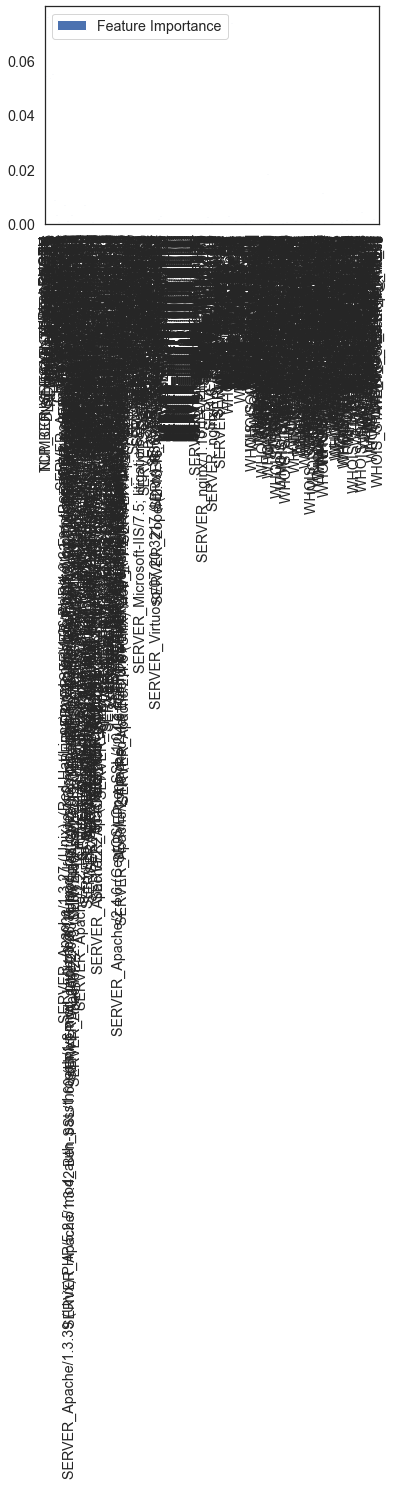

In [31]:
feat_importance = rf_web_model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=content_train.columns).plot(kind='bar')

In [626]:
From the above model Random Forest Classifier, I understand that

In [627]:
## Experimenting with changing the number of "folds" in cross-validator 
# Parameters to Try
param_grid = {
                 'n_estimators': [5, 10, 15, 20, 25,30,35,40],
                 'max_depth': [2, 5, 8, 11,14,17,20],
             }

In [628]:
# Run the cross-validation on the classifier
grid_clf = GridSearchCV(rf_model, param_grid, cv=10,return_train_score=True)
grid_clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=True, ran

In [629]:
# Pull the best CV estimator
grid_clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [630]:
# Pull the best params from the given grid
grid_clf.best_params_

{'max_depth': 20, 'n_estimators': 15}

In [631]:
### Provide interpretations of your results. ###

In [632]:
## Tune Random Forest model by varying hyperparamters ##

# Parameters currently in use
print(rf_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [633]:
# Parameters to Try
param_grid = {
                 'n_estimators': [5, 10, 15, 20, 25,30,35,40],
                 'max_depth': [2, 5, 8, 11,14,17,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10] 
             }

In [ ]:
# Run the classifier
grid_clf = GridSearchCV(rf_model, param_grid, cv=10,return_train_score=True)
grid_clf.fit(X_train,y_train)

In [ ]:
grid_clf.best_estimator_

In [ ]:
grid_clf.best_params_

In [ ]:
### Provide interpretations of your results. ###

In [ ]:
# Check Feature Importance
feat_importance = rf_model.feature_importances_
#feat_importance
#pd.DataFrame({'Feature Importance':feat_importance},index=X_train.columns[:]).sort_values(by='Feature Importance', ascending=False)

In [ ]:
# Graph it

# Sort feature importances in descending order
indices = np.argsort(feat_importance)[-1]

# Rearrange feature names so they match the sorted feature importances
#names = [rf_data.feature_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
#plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[2]), feat_importance[indices])

# Add feature names as x-axis labels
#plt.xticks(range(X.shape[2]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
### Report the most important feature(s) based on your Random Forest classifier. ###
# Are you surprised by the results? Explain why.

# Naive Bayes

In [603]:
## Buidl Naive Bayes ##

# Get Dummies
nb_data = pd.get_dummies(df_mal_clean, prefix_sep="_")

# Move the Type column to its own frame
X2 = nb_data.drop(labels='Type', axis='columns')
y2 = nb_data['Type']

In [549]:
### ADD MORE FEATURES ###
#### HELPPPPPPP
#y3 = nb_data['TCP_CONVERSATION_EXCHANGE']
#y4 = nb_data['SOURCE_APP_PACKETS']

In [604]:
# Split dataframe
X2_train, X2_test, y2_train, y2_test = train_test_split(nb_data, y2, test_size=0.3)

In [605]:
# Train the model
gnb_model = GaussianNB()

# Predict
gnb_model.fit(X2_train, y2_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [606]:
# Test the model
y_pred = gnb_model.predict(X2_test)

In [607]:
# Results and Accuracy
print("Print results for 30 test data points:")
print("Predicted labels: ", y_pred[30:70])
print("Ground truth    : ", y2_test.to_numpy()[30:70])

print("Accuracy of GNB: %.2f %%" % ( 100 * accuracy_score(y2_test.to_numpy(), y_pred)))
print('Classification Report:\n{}\n'.format(classification_report(y2_test.to_numpy(),gnb_model.predict(X2_test))))

Print results for 30 test data points:
Predicted labels:  [0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0]
Ground truth    :  [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Accuracy of GNB: 30.09 %
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.20      0.32       458
           1       0.16      0.92      0.28        77

    accuracy                           0.30       535
   macro avg       0.55      0.56      0.30       535
weighted avg       0.83      0.30      0.32       535




In [554]:
### Provide interpretations of your results. ###

In [555]:
# Experimenting with priors 

# .40 to .60 Prior setting
gnb_model2 = GaussianNB(priors=[0.40, 0.60])

# Predict
gnb_model2.fit(X2_train, y2_train)

# Test the model
y_pred2 = gnb_model2.predict(X2_test)

# Results and Accuracy
print("Print results for 30 test data points:")
print("Predicted labels: ", y_pred2[40:60])
print("Ground truth    : ", y2_test.to_numpy()[40:60])

print("Accuracy of GNB: %.2f %%" % ( 100 * accuracy_score(y2_test.to_numpy(), y_pred2)))
print('Classification Report:\n{}\n'.format(classification_report(y2_test.to_numpy(),y_pred2)))

#gnb_model2.fit(nb_data[['DIST_REMOTE_TCP_PORT']],nb_data['Type'])
#gnb_model2 = gnb_model2.fit(X2_train[['REMOTE_IPS']],X2_train['Type'])

Print results for 30 test data points:
Predicted labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Ground truth    :  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1]
Accuracy of GNB: 30.09 %
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.19      0.32       458
           1       0.16      0.94      0.28        77

    accuracy                           0.30       535
   macro avg       0.56      0.56      0.30       535
weighted avg       0.83      0.30      0.32       535




In [558]:
# Experimenting with priors 

# .50 to .50 Prior setting
gnb_model3 = GaussianNB(priors=[0.50, 0.50])

# Predict
gnb_model3.fit(X2_train, y2_train)

# Test the model
y_pred3 = gnb_model3.predict(X2_test)

# Results and Accuracy
print("Print results for 30 test data points:")
print("Predicted labels: ", y_pred3[40:60])
print("Ground truth    : ", y2_test.to_numpy()[40:60])

print("Accuracy of GNB: %.2f %%" % ( 100 * accuracy_score(y2_test.to_numpy(), y_pred3)))
print('Classification Report:\n{}\n'.format(classification_report(y2_test.to_numpy(),y_pred3)))

#gnb_model2.fit(nb_data[['DIST_REMOTE_TCP_PORT']],nb_data['Type'])
#gnb_model2 = gnb_model2.fit(X2_train[['REMOTE_IPS']],X2_train['Type'])

Print results for 30 test data points:
Predicted labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Ground truth    :  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1]
Accuracy of GNB: 30.47 %
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.20      0.33       458
           1       0.16      0.94      0.28        77

    accuracy                           0.30       535
   macro avg       0.56      0.57      0.30       535
weighted avg       0.84      0.30      0.32       535




In [609]:
# Experimenting with priors 

# .30 to .70 Prior setting
gnb_model4 = GaussianNB(priors=[0.30, 0.70])

# Predict
gnb_model4.fit(X2_train, y2_train)

# Test the model
y_pred4 = gnb_model4.predict(X2_test)

# Results and Accuracy
print("Print results for 30 test data points:")
print("Predicted labels: ", y_pred4[40:60])
print("Ground truth    : ", y2_test.to_numpy()[40:60])

print("Accuracy of GNB: %.2f %%" % ( 100 * accuracy_score(y2_test.to_numpy(), y_pred4)))
print('Classification Report:\n{}\n'.format(classification_report(y2_test.to_numpy(),y_pred4)))

#gnb_model2.fit(nb_data[['DIST_REMOTE_TCP_PORT']],nb_data['Type'])
#gnb_model2 = gnb_model2.fit(X2_train[['REMOTE_IPS']],X2_train['Type'])

Print results for 30 test data points:
Predicted labels:  [1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1]
Ground truth    :  [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
Accuracy of GNB: 30.28 %
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.19      0.32       458
           1       0.17      0.95      0.28        77

    accuracy                           0.30       535
   macro avg       0.56      0.57      0.30       535
weighted avg       0.84      0.30      0.32       535




In [562]:
### Provide interpretations of your results. ###
#the smaller the y value the bigger the accruacy

In [ ]:
#Summarize your findings, including which classifier and paramters gave you the best results and include an 
#in-depth explanation of how you might improve your results. You should also investigate what the different 
#fields mean, so you'll need to do some research about websites and internet protocols! (15 points)

####visualzie

In [ ]:
# Credits to:::